In [444]:
import os
import sys

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['PYTHONIOENCODING'] = 'utf-8'

import matplotlib.pyplot as plt
import pathlib
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras

#sys.stdout.reconfigure(encoding='utf-8')
#sys.stderr.reconfigure(encoding='utf-8')

size_tuple = (150,150)
epochs = 35

In [445]:
categorias = []
labels = []
imagenes  = []

In [446]:
categorias =  [archivo for archivo in os.listdir("Imagenes") if not archivo.startswith('.')]
print(categorias)

['Boca', 'Estudiantes', 'Gimnasia', 'Independiente', 'Racing', 'River', 'San Lorenzo']


In [447]:
x=0
for directorio in categorias:
    imagenes_dir = [imagen for imagen in os.listdir('Imagenes/'+directorio) if not imagen.startswith('.')]
    for imagen in imagenes_dir:
        img = Image.open('Imagenes/'+directorio+'/'+imagen).resize(size_tuple)
        img = np.asarray(img)
        imagenes.append(img)
        labels.append(x)
    x += 1

In [448]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


In [449]:
imagenes=np.asanyarray(imagenes)
imagenes.shape
imagenes = imagenes[:,:,:,0]

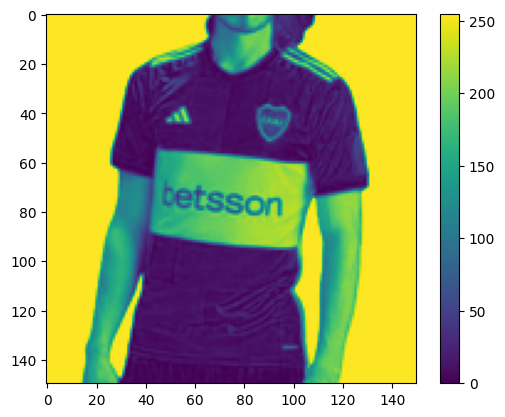

In [450]:
plt.figure()
plt.imshow(imagenes[7])
plt.colorbar()
plt.grid(False)
plt.show()

In [451]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=size_tuple),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0,2),
    tf.keras.layers.Dense(10,activation='softmax')
])

c:\Users\Gabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [452]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [453]:
labels = np.array(labels)

In [454]:
history = model.fit(imagenes, labels, epochs=epochs)

Epoch 1/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.0996 - loss: 3555.6958
Epoch 2/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1243 - loss: 13766.1035
Epoch 3/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1260 - loss: 8351.4697
Epoch 4/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1321 - loss: 7472.7583
Epoch 5/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2935 - loss: 5213.0801
Epoch 6/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3824 - loss: 3571.8318
Epoch 7/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3612 - loss: 2647.5024
Epoch 8/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4383 - loss: 1835.2701
Epoch 9/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3678 - loss: 1468.7374
Epoch 10/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3214 - loss: 995.6493 
Epoch 11/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3663 - loss: 545.0164
Epoch 12/35
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - 

In [455]:
imagen_prueba = "Validacion/example2.jpg"
im = Image.open(imagen_prueba).resize(size_tuple)
im = np.asarray(im)
im = im[:,:,0]
im = np.asarray([im])
im.shape
test=im

In [456]:
prediccion = model.predict(test)  
print(prediccion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


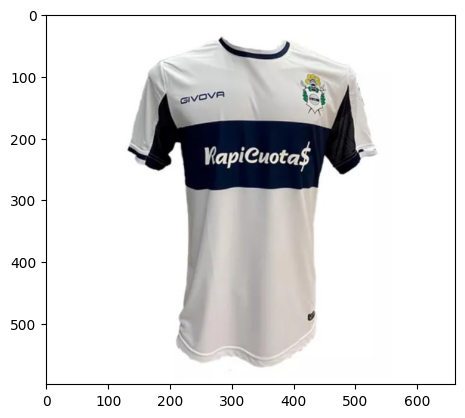

In [457]:
img = Image.open(imagen_prueba)
plt.figure()
plt.imshow(img)
plt.show()

In [458]:

categorias[np.argmax(prediccion[0])]

'Gimnasia'

In [459]:
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_25 (Flatten)            │ (None, 22500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │     2,880,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,644,256 (32.98 MB)

 Trainable params: 2,881,418 (10.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,762,838 (21.98 MB)

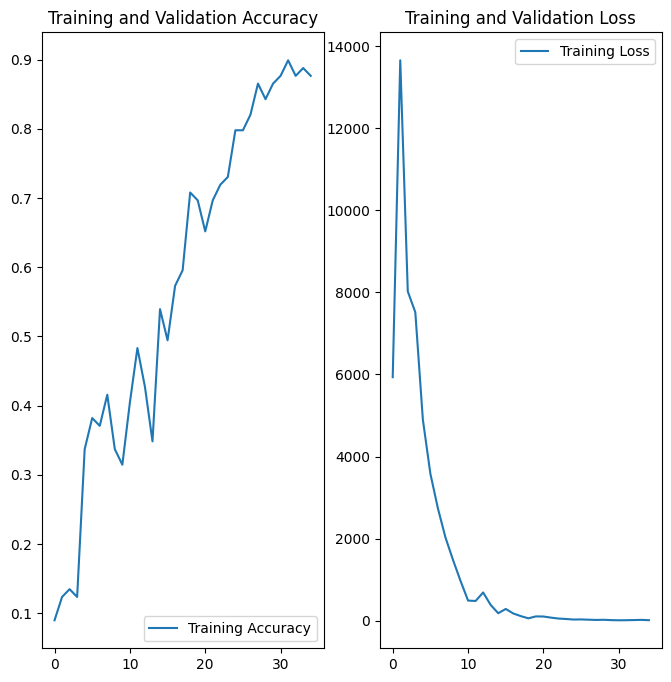

In [460]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [461]:
tf.keras.utils.plot_model(model,to_file='rna.png', show_shapes=True,rankdir='LR')

You must install pydot (`pip install pydot`) for `plot_model` to work.
